In [37]:

def run_idl_script(script_file_name):
    import subprocess

    cmdstr = "{idlcmd} -quiet -e '.run {script}'".format(idlcmd=idlcmd, 
                                                         script=script_file_name)
    subp = subprocess.Popen(cmdstr, stderr=subprocess.PIPE, stdout=subprocess.PIPE,
                            shell = True)

    (idl_stdout, _) = subp.communicate()

    return idl_stdout

In [5]:
from subprocess import check_output

In [47]:
def idl_extract_analog(fname):
    idlcmdpath = '/tools/itt/idl83/idl83/bin/idl'
    lev0base = '/maven_iuvs/production/products/level0/'
    idlscriptcmd = 'iuvs_extract_analog, file="{base}{fname}"'.format(base=lev0base,
                                                                fname=fname)
    cmdlist = [idlcmdpath, '-quiet', '-e', idlscriptcmd]
    output = check_output(cmdlist)
    return output.decode()

In [59]:
path = io.get_data_path('l0')

TypeError: unsupported operand type(s) for /: 'bool' and 'str'

In [58]:
io.l0_filenames('201412', iterator=False, stage=False)

/maven_iuvs/production/products/level0


[]

In [48]:
print(idl_extract_analog('mvn_iuv_all_l0_20141201_v002.dat'))

generic: 
/home/klay6683/IUVS-ITF-SW_subversion/anc/spice/generic_kernels/
generic.tm: 
/home/klay6683/IUVS-ITF-SW_subversion/anc/spice/generic_kernels//generic.tm
mvn
/home/klay6683/IUVS-ITF-SW_subversion/anc/spice//mvn/
mvn.tm/home/klay6683/IUVS-ITF-SW_subversion/anc/spice//mvn//mvn.tm
pkt rate       873.41211pkts/sec
2015-06-26T22:39:16.000,IUVS_EXTRACT_ANALOG:139,1000 packets processed so far, of which 41 were analog, 11 hardware, 21 software, for a total of 73 housekeeping packets. 907 were image packets, leaving 20 unrecognized (4).
pkt rate       838.96240pkts/sec
2015-06-26T22:39:17.000,IUVS_EXTRACT_ANALOG:139,2000 packets processed so far, of which 108 were analog, 27 hardware, 54 software, for a total of 189 housekeeping packets. 1727 were image packets, leaving 84 unrecognized (4).
pkt rate       886.50782pkts/sec
2015-06-26T22:39:18.000,IUVS_EXTRACT_ANALOG:139,3000 packets processed so far, of which 120 were analog, 30 hardware, 60 software, for a total of 210 housekeeping 

In [1]:
cd /maven_iuvs/production/products/housekeeping/level1a/

/iuvs/production/products/housekeeping/level1a


In [2]:
import glob
fnames = glob.glob('*.fits.gz')

In [3]:
from astropy.io import fits

In [4]:
hdulist = fits.open(fnames[0])

In [5]:
hdu = hdulist[0]

In [6]:
class HKReader(object):
    def __init__(self, fname):
        self.hdulist = fits.open(fname)
        for hdu in self.hdulist[1:]:
            name = hdu.header['EXTNAME']
            setattr(self, name+'_header', hdu.header)
            setattr(self, name, hdu.data)
        

In [7]:
hk = HKReader(fnames[0])

In [88]:
vals = hk.AnalogConv.dtype.fields.values()

In [94]:
dt = list(vals)[0]

In [99]:
str(dt[0])

'>i2'

In [113]:
for i,item in enumerate(hk.AnalogConv.dtype.descr):
    if item[1][1] == 'i':
        print(i+1, item)

4 ('APID', '>i2')
6 ('SSC', '>i2')
7 ('DATA_LEN', '>i2')
8 ('SC_CLK_COARSE', '>i4')
9 ('SC_CLK_FINE', '>i2')
10 ('DFB_TERTIARY', '>i2')


In [ ]:
('TSCAL4', 1, '')
('TSCAL6', 1, '')
('TSCAL7', 1, '')
('TSCAL8', 1, '')
('TSCAL9', 1, '')
('TSCAL10', 1, '')
('TZERO4', 32768, '')
('TZERO6', 32768, '')
('TZERO7', 32768, '')
('TZERO8', 2147483648, '')
('TZERO9', 32768, '')
('TZERO10', 32768, '')

In [76]:
hk.AnalogConv_header.cards

('XTENSION', 'BINTABLE', 'Binary table written by MWRFITS v1.11')
('BITPIX', 8, 'Required value')
('NAXIS', 2, 'Required value')
('NAXIS1', 387, 'Number of bytes per row')
('NAXIS2', 2880, 'Number of rows')
('PCOUNT', 0, 'Normally 0 (no varying arrays)')
('GCOUNT', 1, 'Required value')
('TFIELDS', 76, 'Number of columns in table')
('COMMENT', '', '')
('COMMENT', ' *** End of mandatory fields ***', '')
('COMMENT', '', '')
('EXTNAME', 'AnalogConv', '')
('COMMENT', '', '')
('COMMENT', ' *** Column names ***', '')
('COMMENT', '', '')
('TTYPE1', 'VER', '')
('TTYPE2', 'TYPE', '')
('TTYPE3', 'SCND_HDR', '')
('TTYPE4', 'APID', '')
('TTYPE5', 'GRP_FLG', '')
('TTYPE6', 'SSC', '')
('TTYPE7', 'DATA_LEN', '')
('TTYPE8', 'SC_CLK_COARSE', '')
('TTYPE9', 'SC_CLK_FINE', '')
('TTYPE10', 'DFB_TERTIARY', '')
('TTYPE11', 'ANA_CHECKSUM', '')
('TTYPE12', 'FUV_CHIP_TEMP_C', '')
('TTYPE13', 'FUV_P3_3_V_ADC_V', '')
('TTYPE14', 'FUV_P3_3_V_PIX_V', '')
('TTYPE15', 'P5_V_DET_MON_V', '')
('TTYPE16', 'P3_3_V_DET_MON

In [64]:
temp_cols = [value for value in hk.AnalogConv_header.values() if 'temp' in str(value).lower()]
temp_cols.extend('sc_clk_coarse sc_clk_fine'.upper().split())
time_cols = 'sc_clk_coarse sc_clk_fine'.upper().split()

In [5]:
d = {}
for col in temp_cols:
    d[col] = hk.AnalogConv[col]

NameError: name 'temp_cols' is not defined

In [62]:
df = pd.DataFrame(d)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2880 entries, 0 to 2879
Data columns (total 23 columns):
FUV_CHIP_TEMP_C      2880 non-null float64
FUV_DET_TEMP_C       2880 non-null float64
FUV_INT_TEMP_C       2880 non-null float64
GRAT_MOT_TEMP_C      2880 non-null float64
HV_POWR_TEMP_C       2880 non-null float64
IUVS_1_TEMP_C        2880 non-null float64
IUVS_2_TEMP_C        2880 non-null float64
IUVS_3_TEMP_C        2880 non-null float64
IUVS_4_TEMP_C        2880 non-null float64
IUVS_5_TEMP_C        2880 non-null float64
MUV_CHIP_TEMP_C      2880 non-null float64
MUV_DET_TEMP_C       2880 non-null float64
MUV_INT_TEMP_C       2880 non-null float64
OP_1_HTR_TEMP_C      2880 non-null float64
OP_2_HTR_TEMP_C      2880 non-null float64
POWER_BD1_TEMP_C     2880 non-null float64
POWER_BD2_TEMP_C     2880 non-null float64
PROC_BD_TEMP_C       2880 non-null float64
SCAN_MOT_TEMP_C      2880 non-null float64
SC_CLK_COARSE        2880 non-null float64
SC_CLK_FINE          2880 non-nul

In [69]:
%matplotlib nbagg

In [73]:
import seaborn as sns

In [74]:
sns.set_context('talk')

<IPython.core.display.Javascript object>


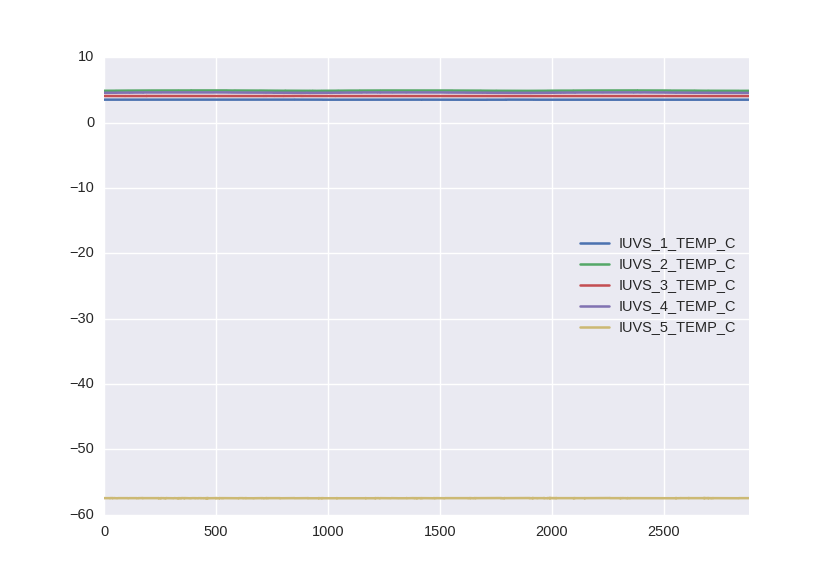

In [75]:
df.filter(regex='IUVS').plot()